In [137]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy import signal
import matplotlib.pyplot as plt

In [227]:
def apply_tremolo(sig, rate=10, fn=np.sin):
    x = np.arange(0, sig.shape[0], 1)
    trem = fn(x / sample_rate * rate)
    return sig * trem, trem

In [228]:
sample_rate, raw_signal = wavfile.read('./files/64.wav')
sig = raw_signal.astype(float) / 2**15
sig = sig.sum(axis=1) / 2
sig, trem = apply_tremolo(sig, fn=np.sin, rate=40)

/var/folders/c0/m79gd7p16tv11hh4pbbvlw640000gn/T/ipykernel_2640/4028688150.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, raw_signal = wavfile.read('./files/64.wav')


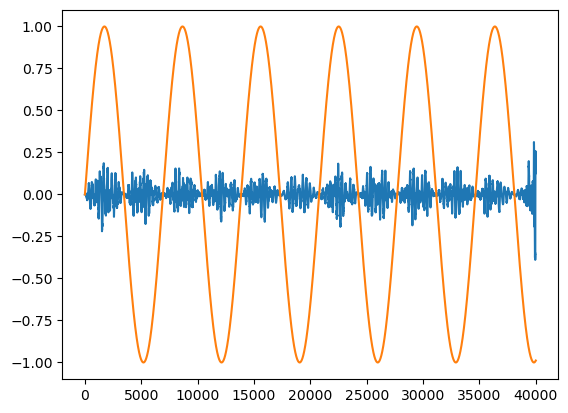

In [229]:
plot_sample = 40_000
plt.figure()
plt.plot(sig[:plot_sample])
plt.plot(trem[:plot_sample])
wavfile.write("./files/64-tremolo.wav", sample_rate, sig)